# Climate Change Belief Analysis

##### Classification_TeamMM1_DSFT21

# Introduction

We live on a planet with finite natural resources, these resources are the basis on which the modern economy is built upon. An outcome of using natural resources to fuel the modern economy, given by scientific evidence is climate change. The scientific evidence is overwhelming but there are still those who deny the existence of climate change.

The split in opinion on the existence of climate change affects businesses. Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. 

EDSA is challenging the team during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

# Table of Contents

1.Importing Libraries

2.Importing Dataset

3.Data Preprocessing

4.Exploratory Data Analysis

5.Feature Engineering and Selection

6.Model Selection

7.Model Evaluation


# Importing Libraries

In [3]:
# Importing modules for data science and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 180
# NLP Libraries
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from os import path
from PIL import Image
# ML Libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import pos_tag
# sklearn library and the linear and rbf kernels
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset

In [5]:
# Loading in the datasets
train = pd.read_csv("https://raw.githubusercontent.com/EveSithole/MM1_classification_predict/main/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/EveSithole/MM1_classification_predict/main/test_with_no_labels.csv")
#sample_submission = pd.read_csv('sample_submission.csv')

# Data Preprocessing

## Summary Statistics

In [21]:
# Looking at the first few entries in the dataset
train.head()


,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [22]:
# Shape of the dataset
train.shape

(15819, 3)

In [23]:
# dataframe information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [24]:
# Looking at the numbers of possible classes in our sentiment
train['sentiment'].unique()

array([ 1,  2,  0, -1], dtype=int64)

In [25]:
# Looking at the how the messages are distributed across the sentiment
train.describe()

,sentiment,tweetid
count,15819.000000,15819.000000
mean,0.917504,501719.433656
std,0.836537,289045.983132
min,-1.000000,6.000000
25%,1.000000,253207.500000
50%,1.000000,502291.000000
75%,1.000000,753769.000000
max,2.000000,999888.000000


## Missing values

In [26]:
# Checking for missing values
train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

As we can see our dataset has no missing values.

In [27]:
# Checking whether a character is white-space character or not
print(len(train['message']))
print(sum(train['message'].apply(lambda x: x.isspace())))

15819
0


In [28]:
# Sample tweet
tweet = train.iloc[6,1]
print(tweet)

RT @thenation: Mike Pence doesn’t believe in global warming or that smoking causes lung cancer. https://t.co/gvWYaauU8R


Text(0.5, 1.0, 'Distribution of target labels')

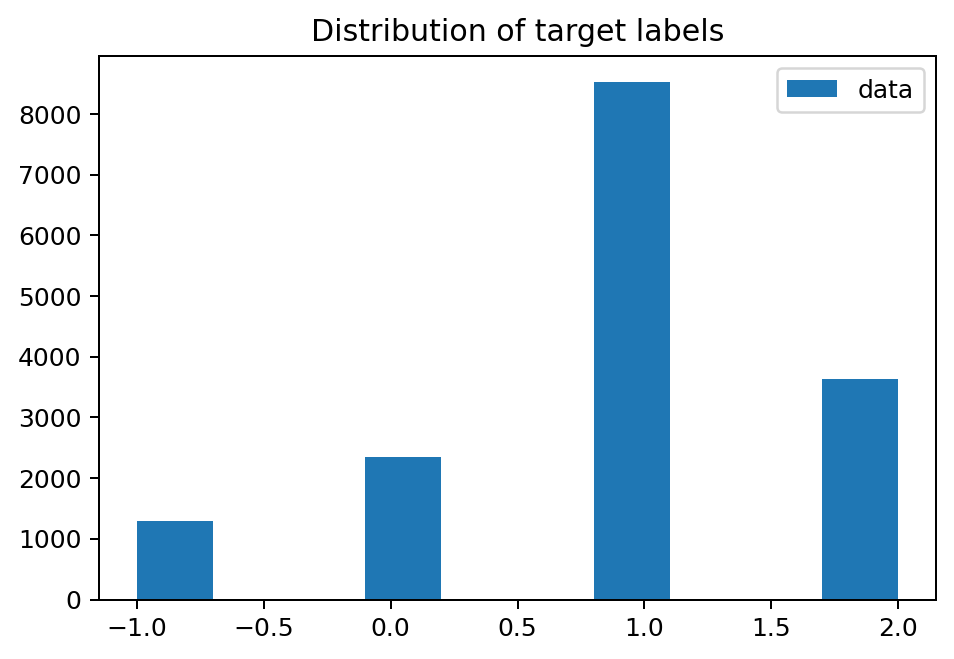

In [29]:
# Visualizing the distribution of the target 
plt.hist(train['sentiment'], label='data');
plt.legend();
plt.title('Distribution of target labels')

Text(0, 0.5, 'Density')

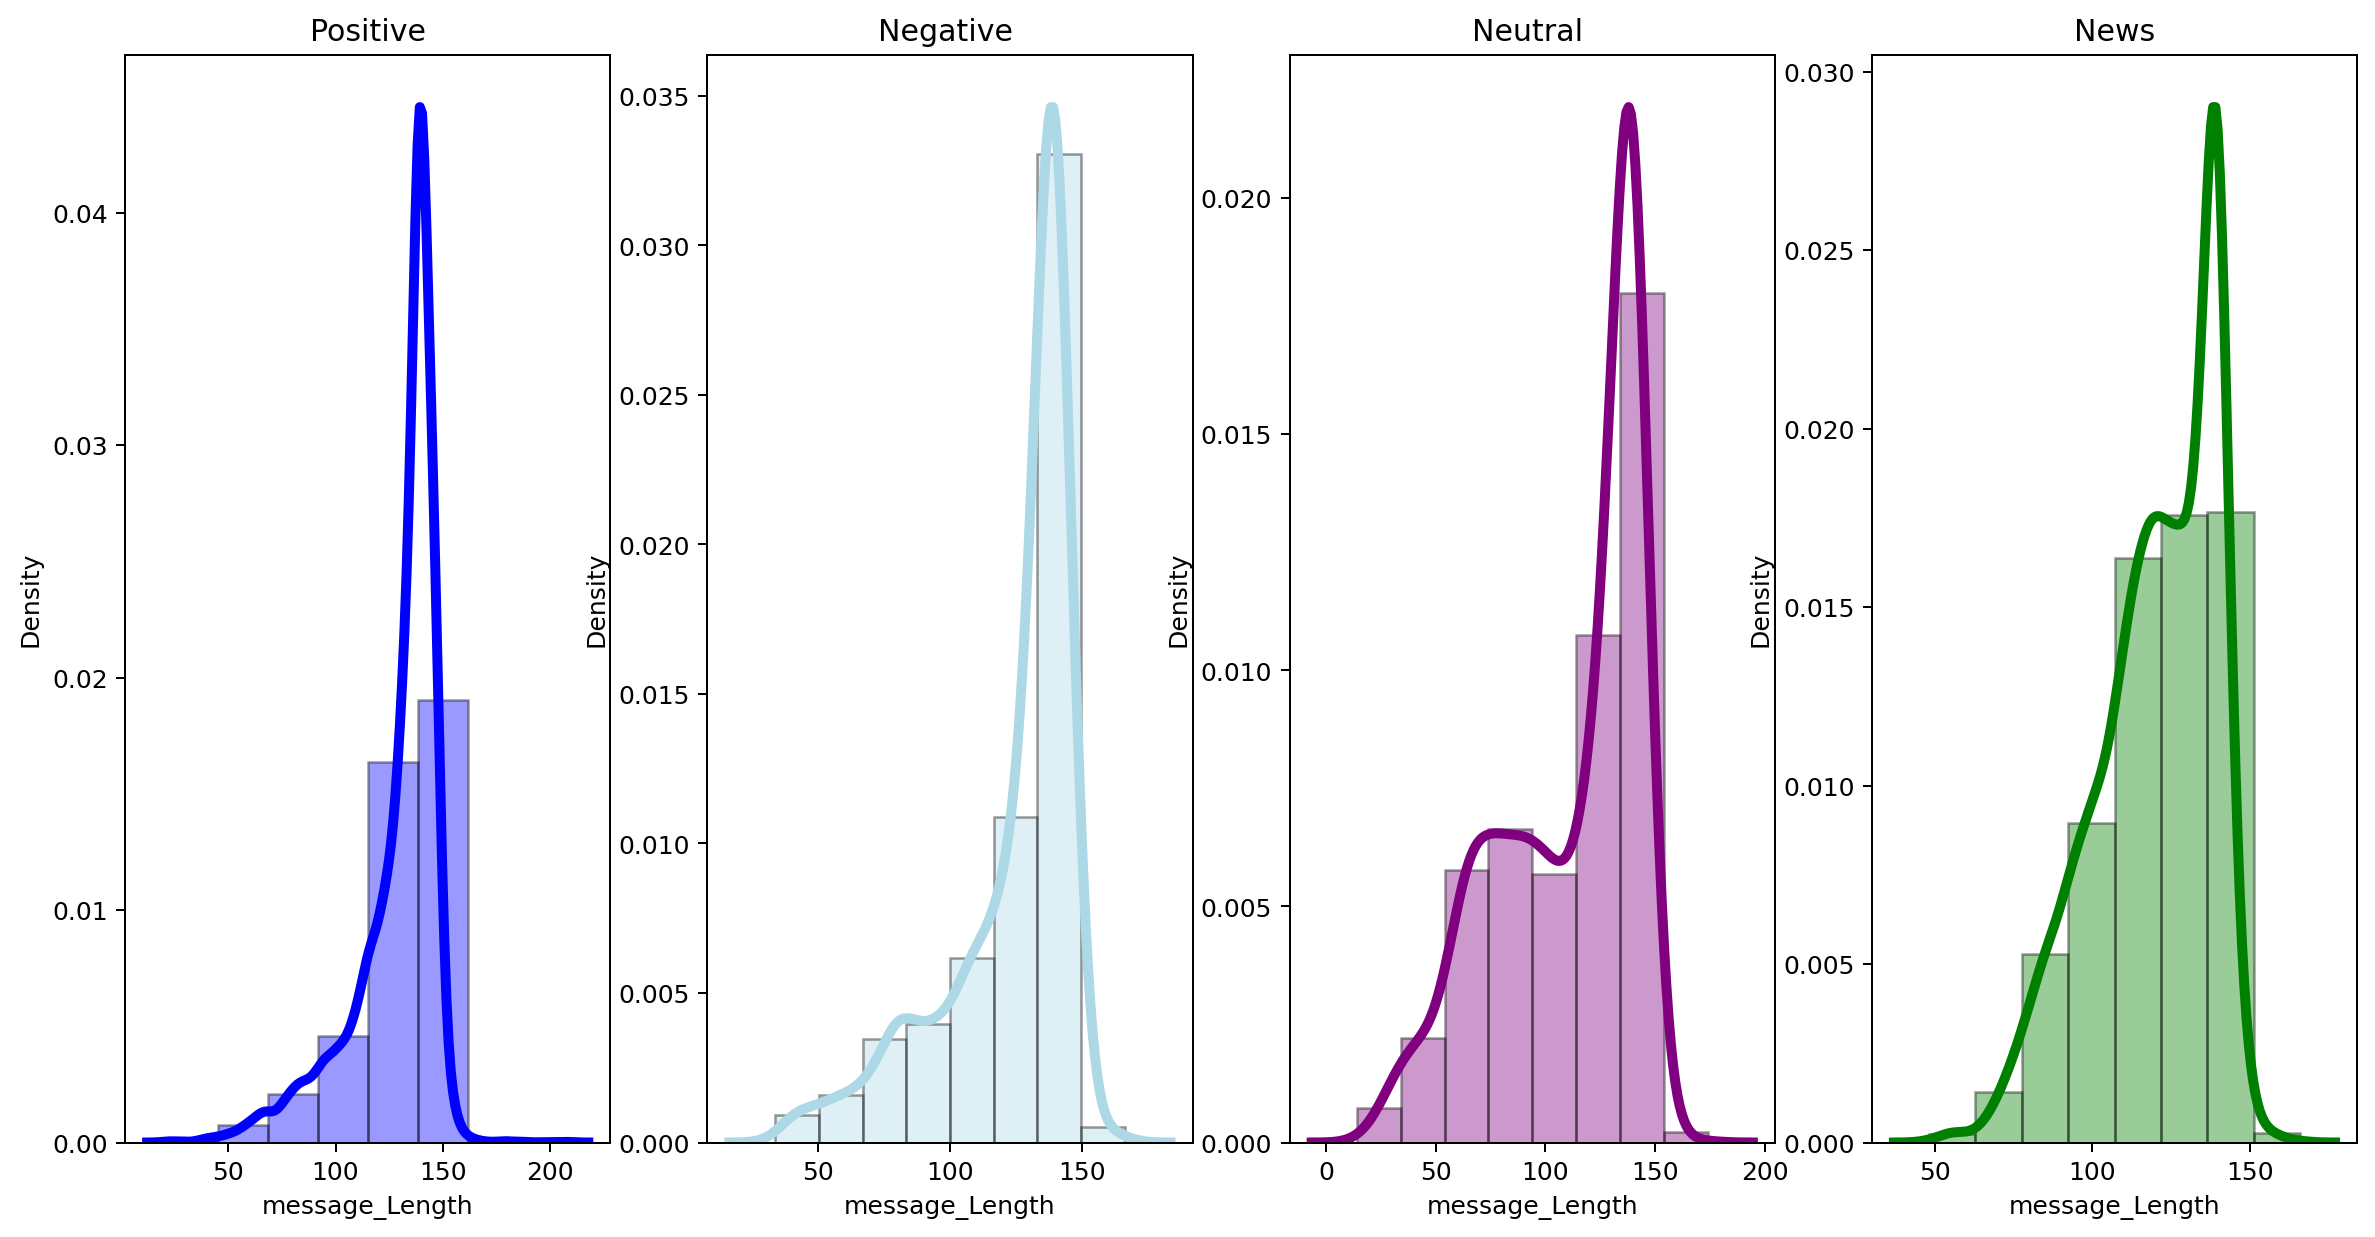

In [30]:
# Distribution plots for the label
fig,(ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(16,8))

#For Positive 
sns.distplot(train[train['sentiment']==1]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'blue', 
             ax = ax1,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax1.set_title('Positive')
ax1.set_xlabel('message_Length')
ax1.set_ylabel('Density')

#For Negative 
sns.distplot(train[train['sentiment']==-1]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'lightblue', 
             ax = ax2,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax2.set_title('Negative ')
ax2.set_xlabel('message_Length')
ax2.set_ylabel('Density')

#For Neutral 
sns.distplot(train[train['sentiment']==0]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'purple',  
             ax = ax3,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax3.set_title('Neutral ')
ax3.set_xlabel('message_Length')
ax3.set_ylabel('Density')

#For Neews
sns.distplot(train[train['sentiment']==2]['message'].str.len(), hist=True, kde=True,
             bins=int(200/25), color = 'green', 
             ax = ax4,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax4.set_title('News')
ax4.set_xlabel('message_Length')
ax4.set_ylabel('Density')

# Exploratory Data Analysis

We need to perform investigative and detective analysis on our data to see if we can gain any useful insights. We have data being generated from tweets, it’s important to utilize Exploratory Data Analysis to analyze all this text data, with the aid of Visuals to help organizations make data-driven decisions.

In [31]:
new_df = train.copy()

#Labeling the target
new_df['sentiment'] = [['Negative', 'Neutral', 'Positive', 'News'][x+1] for x in new_df['sentiment']]

In [32]:
import squarify

# checking the numerical distribution
values = new_df['sentiment'].value_counts()/new_df.shape[0]
labels = (new_df['sentiment'].value_counts()/new_df.shape[0]).index 
colors = ['lightgreen', 'blue', 'purple', 'lightsteelblue']

squarify.plot(sizes=values, label=labels,  color=colors, alpha=0.6)
plt.axis('off')
plt.show()

ModuleNotFoundError: No module named 'squarify'

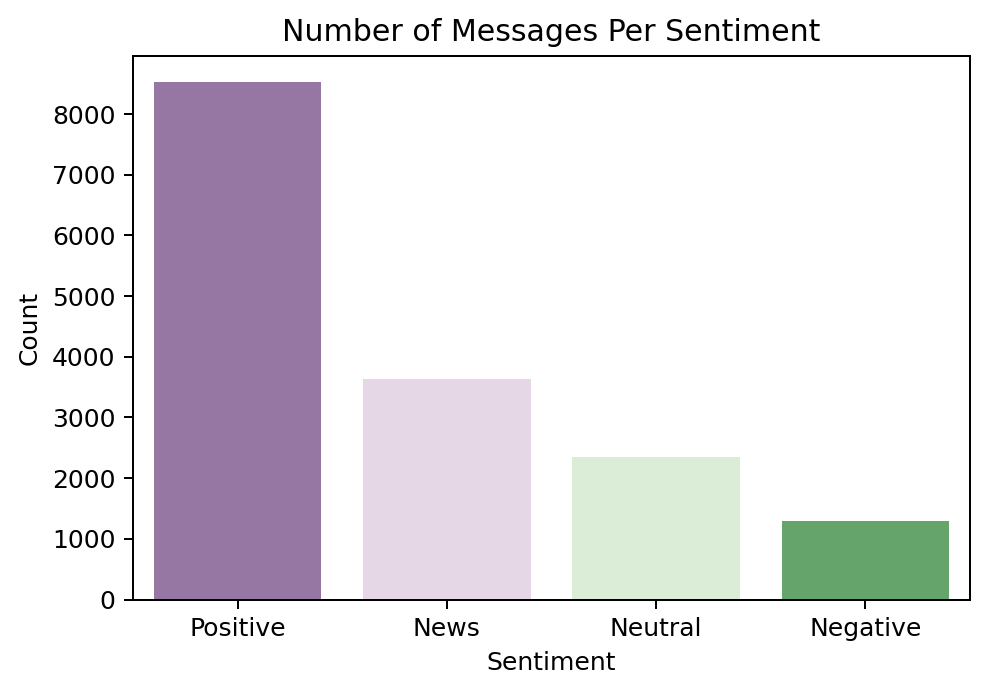

In [33]:
sns.countplot(x='sentiment' ,data = new_df, palette='PRGn')
plt.ylabel('Count')
plt.xlabel('Sentiment')
plt.title('Number of Messages Per Sentiment')
plt.show()

As we noted earlier that there is an imbalance of classes in the daset, this can lead to a disproportionate ratio of observations in each class, causing problems as most algorithms are designed to maximize accuracy and reduce error. We therefore continue to analyse and evaluate for more insights to be derived from the dataset as we prepared to balance later on in the analysis.

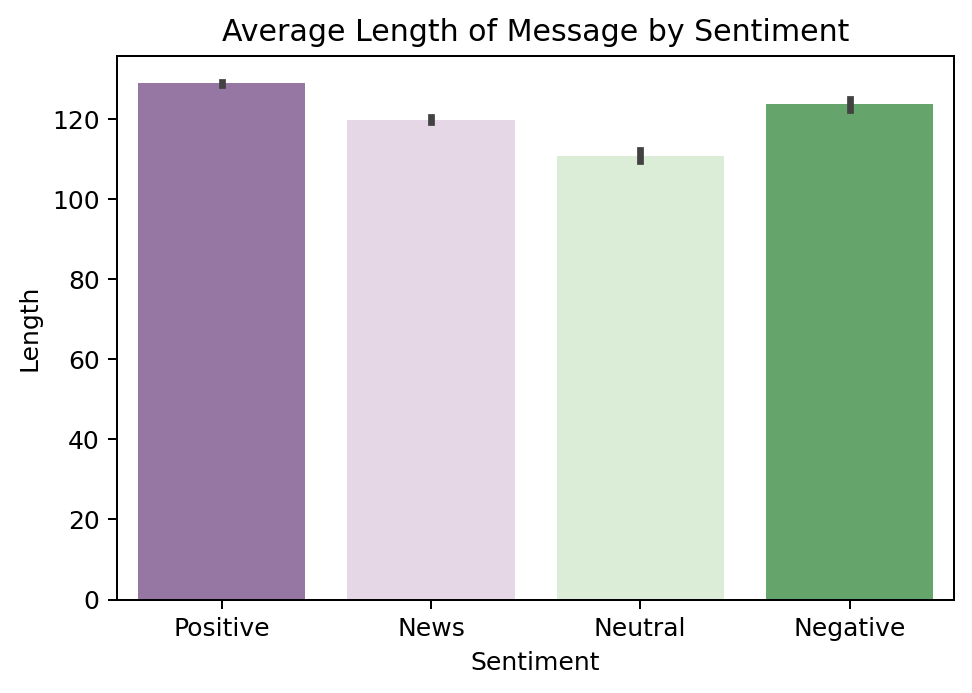

In [34]:
# Visualizing text lengths for each sentiment
sns.barplot(x='sentiment', y=new_df['message'].apply(len) ,data = new_df, palette='PRGn')
plt.ylabel('Length')
plt.xlabel('Sentiment')
plt.title('Average Length of Message by Sentiment')
plt.show()

In [35]:
# Extracting Users in a column
new_df['users'] = [''.join(re.findall(r'@\w{,}', line)) 
                       if '@' in line else np.nan for line in new_df.message]

# Creating a column of hastags
new_df['hashtags'] = [' '.join(re.findall(r'#\w{,}', line)) 
                       if '#' in line else np.nan for line in new_df.message]

In [36]:
# Generating Counts of users
counts = new_df[['message', 'users']].groupby('users', as_index=False).count().sort_values(by='message', ascending=False)

In [37]:
# Top 5 most popular
counts.head()

,users,message
3410,@StephenSchlegel,307
3270,@SenSanders,243
6182,@realDonaldTrump,143
448,@BernieSanders,121
612,@CNN,106


In [38]:
# checking the numerical distribution
values = [sum(np.array(counts['message']) == 1)/len(counts['message']), sum(np.array(counts['message']) != 1)/len(counts['message'])]
labels = ['First Time Tags', 'Repeated Tags']
colors = ['lightsteelblue', "purple"]

squarify.plot(sizes=values, label=labels,  color=colors, alpha=0.6)
plt.axis('off')
plt.show()

NameError: name 'squarify' is not defined

In [39]:
repeated_tags_rate = round(sum(np.array(counts['message']) > 1)*100/len(counts['message']), 1)
print(f"{repeated_tags_rate} percent of the data are from repeated tags")

14.6 percent of the data are from repeated tags


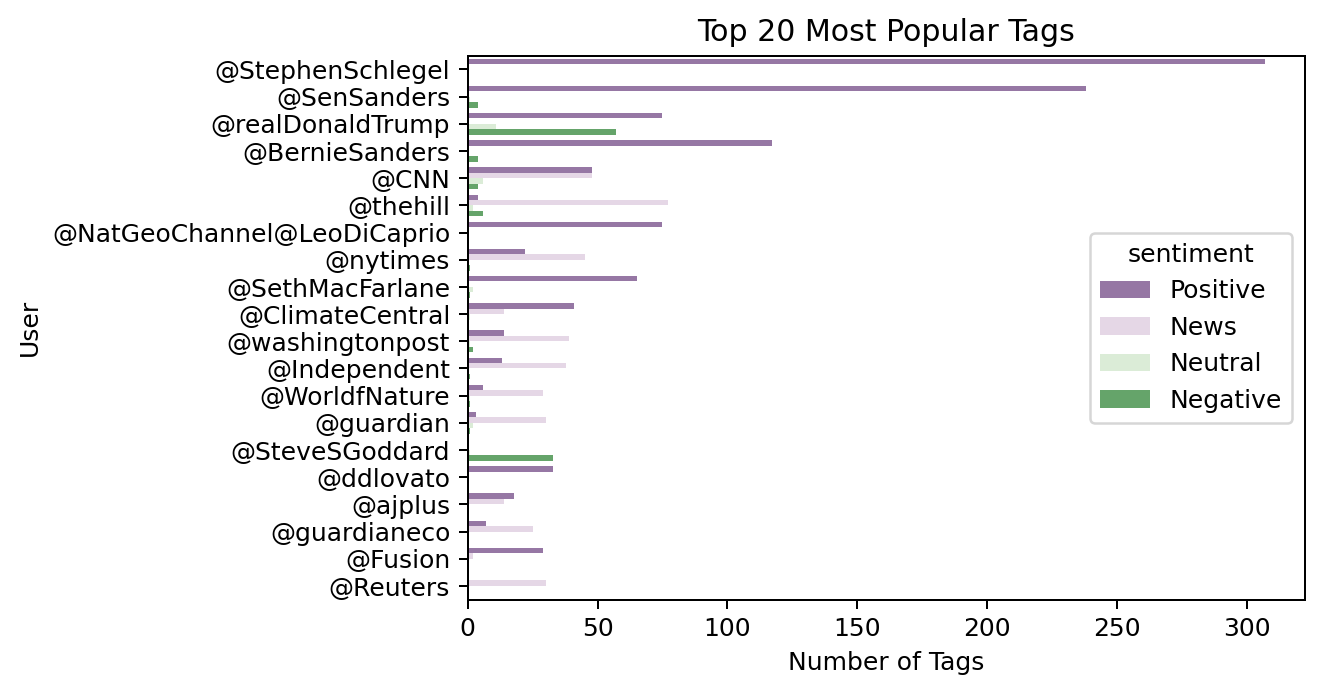

In [40]:
# Analysis of most popular tags, sorted by populariy
sns.countplot(y="users", hue="sentiment", data=new_df, palette='PRGn',
              order=new_df.users.value_counts().iloc[:20].index) 

plt.ylabel('User')
plt.xlabel('Number of Tags')
plt.title('Top 20 Most Popular Tags')
plt.show()
#plt.xticks(rotation=90)

Now that we've had a look at the tweets themselves as well as the users, we now analyse the hastags:

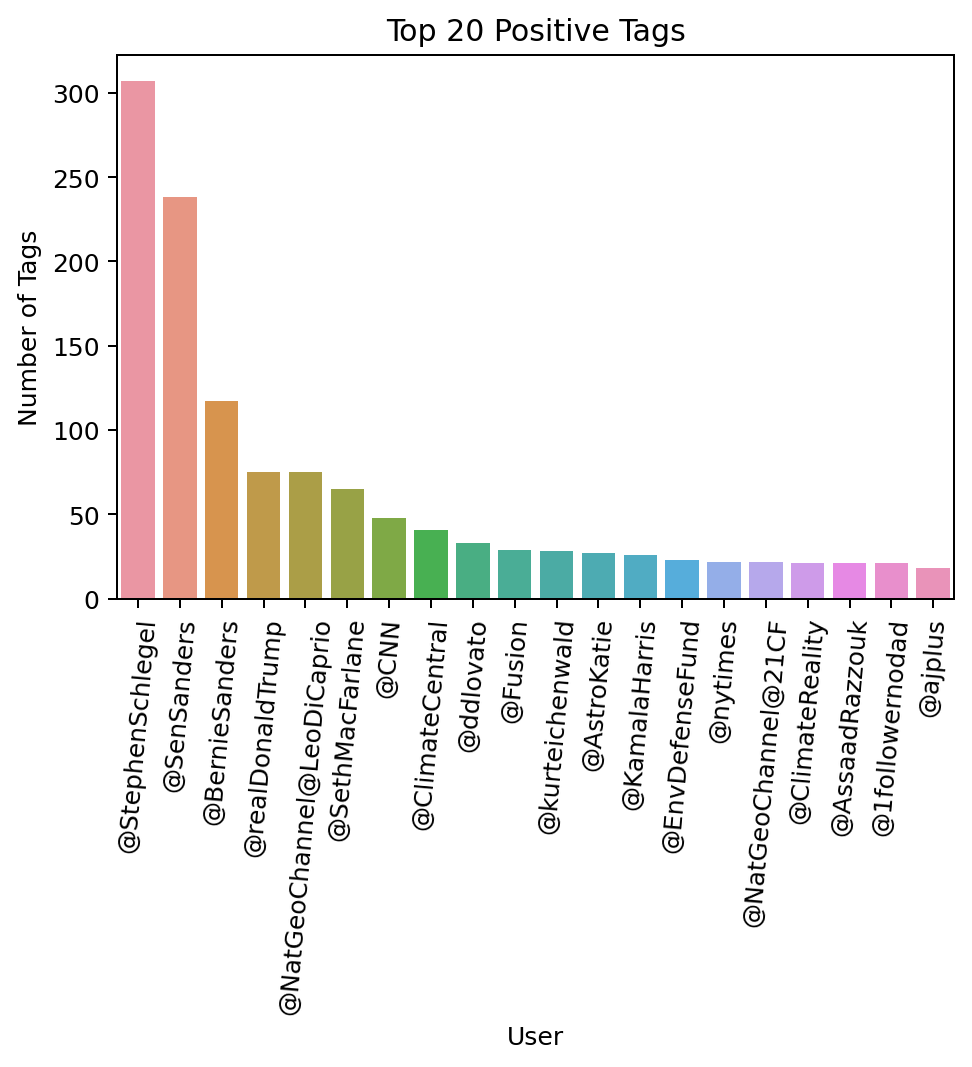

In [41]:
# Analysis of most popular tags, sorted by populariy
sns.countplot(x="users", data=new_df[new_df['sentiment'] == 'Positive'],
              order=new_df[new_df['sentiment'] == 'Positive'].users.value_counts().iloc[:20].index) 

plt.xlabel('User')
plt.ylabel('Number of Tags')
plt.title('Top 20 Positive Tags')
plt.xticks(rotation=85)
plt.show()


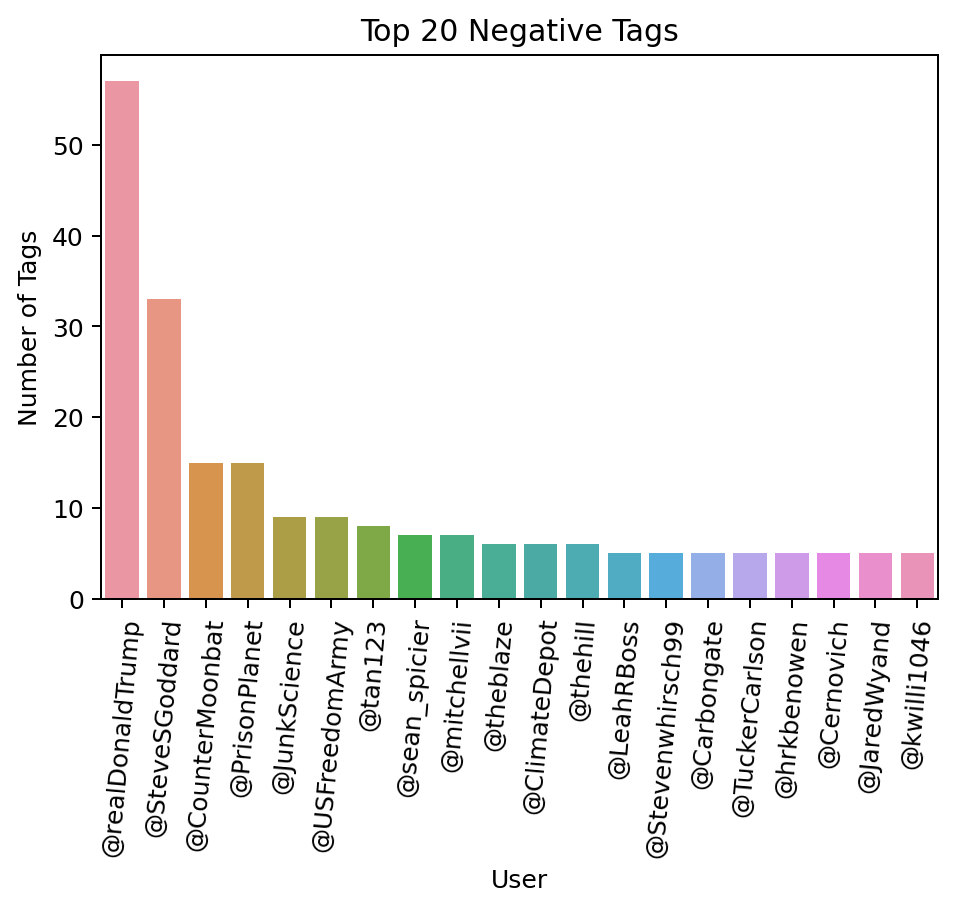

In [42]:
# Analysis of most popular tags, sorted by populariy
sns.countplot(x="users", data=new_df[new_df['sentiment'] == 'Negative'],
              order=new_df[new_df['sentiment'] == 'Negative'].users.value_counts().iloc[:20].index) 

plt.xlabel('User')
plt.ylabel('Number of Tags')
plt.title('Top 20 Negative Tags')
plt.xticks(rotation=85)
plt.show()


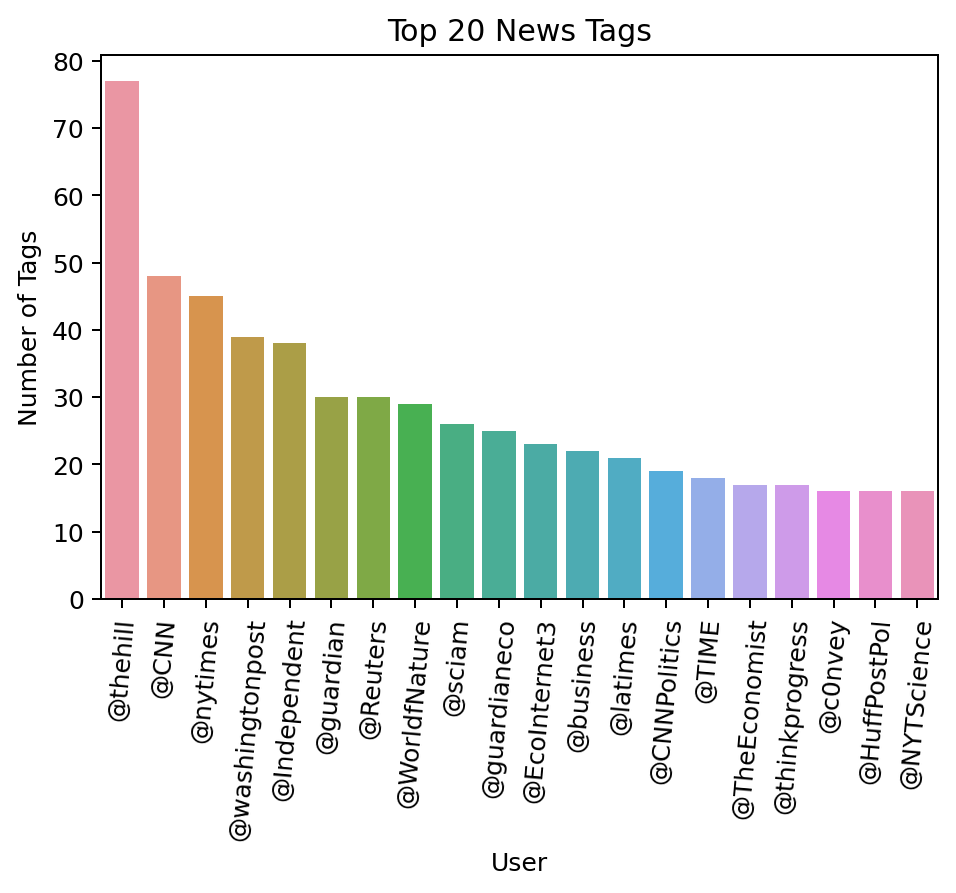

In [43]:
# Analysis of most popular tags, sorted by populariy
sns.countplot(x="users", data=new_df[new_df['sentiment'] == 'News'],
              order=new_df[new_df['sentiment'] == 'News'].users.value_counts().iloc[:20].index) 

plt.xlabel('User')
plt.ylabel('Number of Tags')
plt.title('Top 20 News Tags')
plt.xticks(rotation=85)
plt.show()


## Data cleaning and feature transformation

**Data cleaning**
The approach used to clean the data is to divide it into 2 sets:
- Data set 1 where the rows with sentiment of 2 (factual news) are removed since they do not tell us whether the tweet is positive, negative or neutal.
- Data set 2 where the rows with sentiment of 2 are kept.

The model/s will then be trained on both sets to see which set performs better.

**Feature transformation**

The CountVectorizer will be used to select and transform the features to numerical form where the parameters are tweaked as follows:
- stopwords = 'english'                   
    removes english stopwords
    
- ngram_range = (2,2)                     
    splits tweets into bigrams
    
- token_pattern = r'\b[^\d\W][^\d\W]+\b'  
    removes all punctuation present in the tweet
    
- max_features = 8000                      
    for space purposes
    
- min_df = 200                            
    ignores terms with a frequency lower than 200



Data set 1:

Remove rows with class 2 (factual news) as the sentiment

In [6]:
# make a copy of the train set
train_copy = train.copy()

#filter the dataframe by sentiment class=2
train_filtered = train_copy[train_copy['sentiment'] == 2]

#drop the filtered rows
train_copy.drop(train_filtered.index, inplace=True)

In [7]:
#check number of rows after dropping rows with sentiment 2(factual news)
train_copy.shape

(12179, 3)

The rows have reduced from 15819 to 12179 after removing rows of sentiment 2

In [8]:
# check if removal of row with sentiment 2 was successful
train_copy['sentiment'].unique()

array([ 1,  0, -1], dtype=int64)

The unique values of the classes are now [ 1,  0, -1] as compared to before which was [ 1,  2,  0, -1] hence the removal of rows with sentiment 2 was successful.

Feature transformation using CountVectorizer

In [9]:
# Vectorization using CountVectorizer
vect = CountVectorizer(stop_words='english',
                      ngram_range=(2,2),
                      token_pattern=r'\b[^\d\W][^\d\W]+\b',
                      max_features = 8000,
                      min_df = 200 
                    
                      )

In [10]:
# Fit the vectorizer
vect.fit(train_copy['message'])

CountVectorizer(max_features=8000, min_df=200, ngram_range=(2, 2),
                stop_words='english',
                token_pattern='\\b[^\\d\\W][^\\d\\W]+\\b')

In [11]:
# Transform the data to a sparse matrix 
x_train = vect.transform(train_copy['message'])
x_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [12]:
# Change the sparse array into a dataframe to view the transformed data.
x_train_df = pd.DataFrame(x_train.toarray(),columns=vect.get_feature_names())
x_train_df.head()

,believe climate,change https,change real,climate change,die husband,doesn believe,donald trump,fight climate,global warming,going die,https https,https sjofonã,husband doesn,president elect,rt sensanders,rt stephenschlegel,stephenschlegel thinking,thinking going,warming https
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


As can be seen from above, the features have transformed to bigrams.

## fitting and plotting a Support Vector Machine with a Linear Decision boundary

when constructing our dataset, we start by setting the feature dimensionality. As we can see below!

In [52]:
#sbo
from sklearn.datasets import make_gaussian_quantiles

# Set the feature dimensionality
p = 2

# Construct the dataset
X, y = make_gaussian_quantiles(cov=3.,
                                 n_samples=1000, n_features=p,
                                 n_classes=2, random_state=1)

In [53]:
# get training and testing data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Now, lets fit the Linear decition boundary

We are going to fit an SVC model, in other words we are telling the SVC to fit the data using linear decision boundary.

In [54]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print("The accuracy score of the SVC is:", accuracy_score(y_test, y_pred))
print("\n\nClassification Report:\n\n", classification_report(y_test, y_pred))

The accuracy score of the SVC is: 0.6133333333333333


Classification Report:

               precision    recall  f1-score   support

           0       0.58      0.83      0.68       150
           1       0.70      0.39      0.50       150

    accuracy                           0.61       300
   macro avg       0.64      0.61      0.59       300
weighted avg       0.64      0.61      0.59       300



### Decision boundary for the SVC

As mentioned before, the SVC calculates and implements a  p−1  dimensional decision boundary (hyperplane) over the input features. Since we are only looking at 2 features (our synthetic dataset only has two features, or  p=2 ), our hyperplane will only have 1 dimension ( p−1 ), so it's going to look like a single line.

Since The model has more than two features. Below, we will visualise the hyperplane for the two features in the dataset.

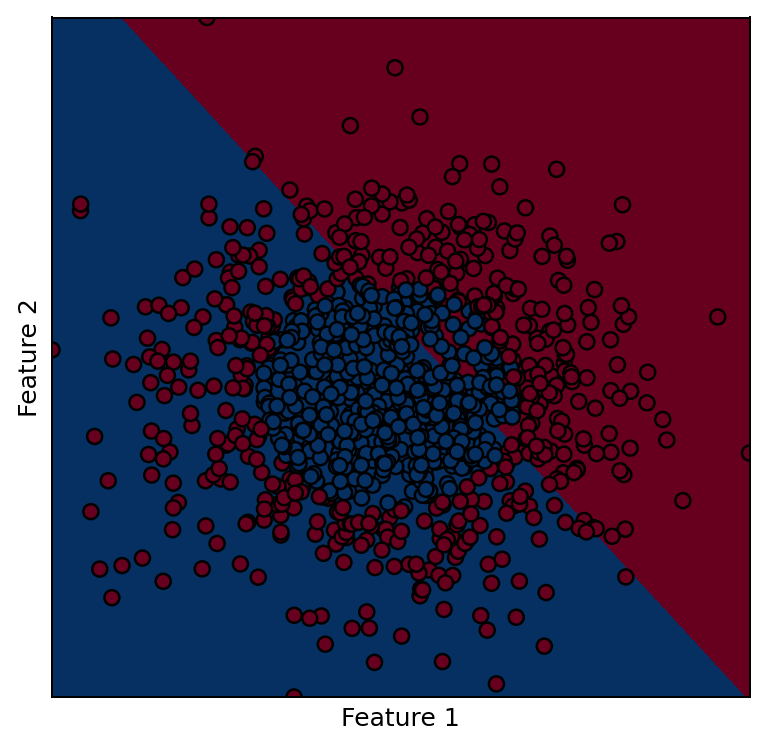

In [55]:
i = 0 # Feature 1
j = 1 # Feature 2

svc.fit(X[:, [i, j]], y)
fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(111)

x_min, x_max = X[:, i].min(), X[:, i].max()
y_min, y_max = X[:, j].min(), X[:, j].max()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))

y_hat = svc.predict(np.concatenate((xx.reshape(-1,1), yy.reshape(-1,1)), axis=1))
y_hat = y_hat.reshape(xx.shape)

ax1.pcolormesh(xx, yy, y_hat, cmap=plt.cm.get_cmap('RdBu_r'))
ax1.scatter(X[:, i], X[:, j], c=y, edgecolors='k', cmap=plt.cm.get_cmap('RdBu_r'))
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_xlim(xx.min(), xx.max())
ax1.set_ylim(yy.min(), yy.max())
ax1.set_xticks(())
ax1.set_yticks(())
plt.show()

In [56]:
parameters = {'kernel':('linear', 'rbf'),
              'C':(0.25,1.0),
              'gamma': (1,2)}
svm = SVC()
clf = GridSearchCV(svm, parameters)
clf.fit(X_train,y_train)


GridSearchCV(estimator=SVC(),
             param_grid={'C': (0.25, 1.0), 'gamma': (1, 2),
                         'kernel': ('linear', 'rbf')})

In [57]:
# Predictions using our tuned model

y_opt = clf.predict(X_test)
print("The accuracy for our tuned model is: ", accuracy_score(y_test, y_opt))

The accuracy for our tuned model is:  0.9666666666666667


This is to get the parameters of the  best model:

In [63]:
clf.best_params_

{'C': 1.0, 'gamma': 1, 'kernel': 'rbf'}

The smaller the amount of C, the greater the amount of shrinkage that occurs.

# Lets try XGBoost

### Train xgboost

Before we can feed our data into our XGBoost model, we need to first transform the text into numbers using Count Vectorization.We will be using the top 200 words that appear most often, to make our model easier to train.

In [51]:
#using the top 50 words that appear most often
vect_200 = CountVectorizer(lowercase=True, stop_words='english', max_features=200,analyzer='word', ngram_range=(1, 3))
X_count = vect_50.fit_transform(train_copy['message'].values.astype(str))

In [52]:
#Defining the features
X = X_count.toarray()
X.shape

(12179, 200)

In [46]:
#Response variable
y=train_copy['sentiment'].values
y.shape

(12179,)

In [47]:
#splitting the train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

In [48]:
#Training and fitting the model
#Train model
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train, y_train)


[12:41:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

### Test & prdict xgboost

In [49]:
# make predictions for test data
y_pred = model.predict(X_test)

In [50]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

import warnings
warnings.filterwarnings('ignore')

              precision    recall  f1-score   support

          -1       0.66      0.18      0.29       262
           0       0.55      0.28      0.37       446
           1       0.77      0.95      0.85      1728

    accuracy                           0.75      2436
   macro avg       0.66      0.47      0.50      2436
weighted avg       0.72      0.75      0.70      2436



The top 50 words give us an f1-score of 65%, 100 words give us 69% and 200 words give us 70%. As we can see there isn't much change with adding more words esp. from 100 to 200 top words.We may need to consider lemmatisation in order to remove words which have the same base meaning.